In [64]:
import os
import csv
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
import glob

## Parsing Data

In [48]:
categories = {}
categories['af'] = 'Acuerdo Final'
categories['ch'] = 'Comisión Histórica del Conflicto y sus Víctimas'
categories['docs'] = 'Documentos'

In [40]:
out_file = 'data/mesa_files_original.csv'
row = ['ID', 'path', 'category', 'sub-category', 'date', 'filename']
hdocs = []
idDoc = -1
for  files in os.walk('data/mesa'):        
    if files[2]:
        for filename in files[2]:
            idDoc = idDoc + 1
            path = files[0]            
            key = path[10:]
            cat = categories[key if key.find('/') is -1 else key[:key.find('/')]]
            subCat = '' if key.find('/') is -1 else key[key.find('/') + 1:]
            date = None
            doc = [idDoc, path, cat, subCat, date, filename]
            hdocs.append(doc)
            
with open(out_file, 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(row)
    wr.writerows(hdocs)

## Cantidad total de documentos

In [49]:
df = pd.read_csv('data/mesa_files.csv')
df.columns = ['ID', 'path', 'category', 'sub_cat', 'date', 'filename']

In [50]:
df['ID'].count()

138

# Frecuencia 

## Cantidad de documentos emitidos por Año

In [51]:
df['date'] = pd.to_datetime(df['date']);
dftime = df.groupby([df['date'].dt.year]).agg({'ID':'count'})
dftime.columns = ['Cantidad']
dftime

,Cantidad
date,
2012.0,7
2013.0,25
2014.0,20
2015.0,19
2016.0,55


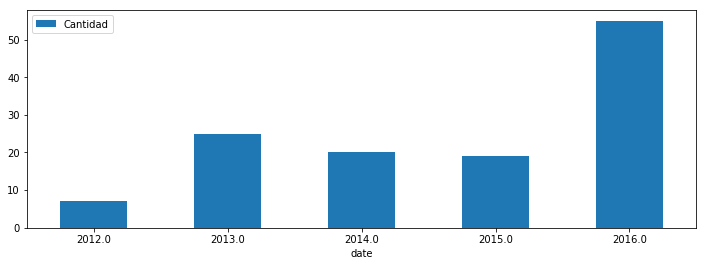

In [52]:
dftime.plot(kind="bar", rot=0)

## Cantidad de documentos emitidos diariamente (15 días con mayor cantidad de docs emitidos)

In [318]:
dftime2 = df.groupby(df['date']).agg({'ID':'count'})
dftime2.columns = ['Cantidad']
dftime2.sort_values(by='Cantidad', ascending=False).head(15)

,Cantidad
date,
2016-05-08,9
2013-08-12,3
2013-06-21,2
2016-11-22,2
2014-05-16,2
2016-09-08,2
2013-06-11,2
2015-12-15,2
2016-06-23,2


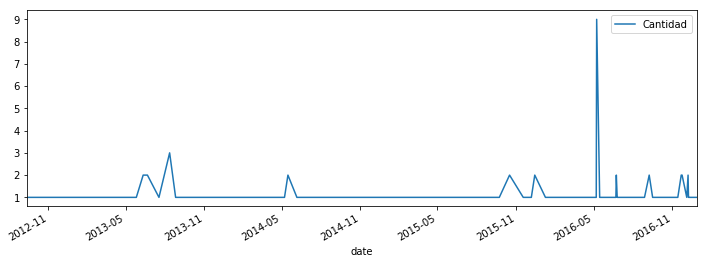

In [319]:
dftime2.plot()

## Cantidad de documentos por Categoría

In [53]:
dfCat = df.groupby([df['category'], df['sub_cat']]).agg({'ID':'count'}).sort_values('ID').reset_index()
dfCat.columns = ["Categoría", "Sub-categoría", "Cantidad"]
dfCat

,Categoría,Sub-categoría,Cantidad
0,Acuerdo Final,Acuerdo Final,1
1,Comisión Histórica del Conflicto y sus Víctimas,Relatorias,2
2,Documentos,Informes,5
3,Comisión Histórica del Conflicto y sus Víctimas,Informes,10
4,Documentos,Borradores,13
5,Documentos,Comunicados,107


# Natural Language Processing

In [ ]:
stop_words_spanish = ['un', 'una', 'unas', 'unos', 'uno', 'sobre', 'todo', 'también', 'tras', 'otro', 'algún', 'alguno', 'alguna', 'algunos', 'algunas', 'ser', 'es', 'soy', 'eres', 'somos', 'sois', 'estoy', 'esta', 'estamos', 'estais', 'estan', 'como', 'en', 'para', 'atras', 'porque', 'por qué', 'estado', 'estaba', 'ante', 'antes', 'siendo', 'ambos', 'pero', 'por', 'poder', 'puede', 'puedo', 'podemos', 'podeis', 'pueden', 'fui', 'fue', 'fuimos', 'fueron', 'hacer', 'hago', 'hace', 'hacemos', 'haceis', 'hacen', 'cada', 'fin', 'incluso', 'primero', 'desde', 'conseguir', 'consigo', 'consigue', 'consigues', 'conseguimos', 'consiguen', 'ir', 'voy', 'va', 'vamos', 'vais', 'van', 'vaya', 'gueno', 'ha', 'tener', 'tengo', 'tiene', 'tenemos', 'teneis', 'tienen', 'el', 'la', 'lo', 'las', 'los', 'su', 'aqui', 'mio', 'tuyo', 'ellos', 'ellas', 'nos', 'nosotros', 'vosotros', 'vosotras', 'si', 'dentro', 'solo', 'solamente', 'saber', 'sabes', 'sabe', 'sabemos', 'sabeis', 'saben', 'ultimo', 'largo', 'bastante', 'haces', 'muchos', 'aquellos', 'aquellas', 'sus', 'entonces', 'tiempo', 'verdad', 'verdadero', 'verdadera', 'cierto', 'ciertos', 'cierta', 'ciertas', 'intentar', 'intento', 'intenta', 'intentas', 'intentamos', 'intentais', 'intentan', 'dos', 'bajo', 'arriba', 'encima', 'usar', 'uso', 'usas', 'usa', 'usamos', 'usais', 'usan', 'emplear', 'empleo', 'empleas', 'emplean', 'ampleamos', 'empleais', 'valor', 'muy', 'era', 'eras', 'eramos', 'eran', 'modo', 'bien', 'cual', 'cuando', 'donde', 'mientras', 'quien', 'con', 'entre', 'sin', 'trabajo', 'trabajar', 'trabajas', 'trabaja', 'trabajamos', 'trabajais', 'trabajan', 'podria', 'podrias', 'podriamos', 'podrian', 'podriais', 'yo', 'aquel', 'a', 'en', 'de', 'para', 'por', 'según', 'sin', 'sobre', 'tras', 'bajo', 'contra', 'hacia', 'hasta', 'rt', 'que', 'se', 'no', 'del', 'al', 'http', 'https', 'y', 'más', 'todos', 'año', 'será', 'este', 'vía', 'les', 'ni', 'dice', 'le', 'está', 'qué', 'hay', 'htt', 'quiere', 'nuestra', 'sí', 'of', 'in', 'años', 'firma' , 'firman', 'nuevo', 'hoy', 'ayer', 'inicio', 'ya', 'histórico', 'día','son', 'final', 'and', 'with', 'you', 'mundo', 'gran', 'sol', 'recibe', 'millones',  'gracias', 'hermana', 'fuego', 'me', 'eso',  'we', 'after', 'camino', 'dijo', 'caminos', 'recibirá', 'entiendo', 'mejores', 'mejor', 'deseos', 'lleve', 'nuevamente', 'ahora', 'definitiva', 'ese', 'definitivo', 'han', 'sino', 'tal', 'mismos', 'estos', 'así', 'ver', 'esto', 'esta', 'sido', 'manera', 'sigo']

In [133]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_top_words = 20
n_samples = 2000
n_features = 1000
n_topics = 5
n_top_words = 10

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx,  " ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [154]:
from nltk import ngrams
import operator
from itertools import islice
import string 
from tabulate import tabulate

def stopWordsInGrams(grams):    
    count = 0
    for w in grams:
        if w in stop_words_spanish:
            count = count + 1                
    return count/len(grams)  

def isNumber(s):
    try: 
        int(s)
        float(s)
        return True
    except ValueError:
        return False

def getNGram(text, n, stop_words, m):
    ngramas = ngrams(text.split(), n)
    h_dict = {}   
    for grams in ngramas:
        if stopWordsInGrams(grams) > 0.34:
            continue
        words = ' '.join(grams)        
        words = words.lower() 
        words = ''.join(e for e in words if e.isalnum() or e == ' ')    
        words = words.strip()  
        if  words in stop_words or words in punct_signs or words == '' or words in abc or isNumber(words) or 'rt' in words or 'http' in words or 'https' in words or len(words.split(' ')) != n:
             continue
        if words in h_dict:
            h_dict[words] = h_dict[words] + 1
        else: 
            h_dict[words] = 1 
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    return list(islice(sorted_dict, m))

def fetch_files_from(path):
    files = []    
    for filename in glob.glob(os.path.join(path, '*.txt')):
        with open(filename) as f:
            files.append(f.read())
    return files

In [137]:
def printTopicsLDAbyCat(dataset):
    data_samples = dataset[:n_samples]        

    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1,
                                           max_features=n_features,
                                           stop_words=stop_words_spanish)

    tfidf = tfidf_vectorizer.fit_transform(data_samples)
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                    max_features=n_features,
                                    stop_words=stop_words_spanish)

    tf = tf_vectorizer.fit_transform(data_samples)

    lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)

    lda.fit(tf)
    tf_feature_names = tf_vectorizer.get_feature_names()
    print_top_words(lda, tf_feature_names, n_top_words)

## 5 Topics por Categoría  LDA from Scikit

In [138]:
for cat in categories:                 
    for  files in os.walk('data/mesa/'+ cat):     
        if(len(files[2])>0):       
            path = files[0]
            print(categories[cat],'--', path.replace('data/mesa/'+ cat , '') ,'\n')    
            dataset = fetch_files_from(path)
            printTopicsLDAbyCat(dataset)

Documentos -- /Informes 

Topic #0:  guerra bogotá violencia social político país frente estados grupos guerrillas
Topic #1:  promover garantías social comunidades rural seguridad fortalecer oposición acordado campo
Topic #2:  guerra bogotá violencia social país político estados guerrillas unidos militar
Topic #3:  social guerra violencia bogotá frente país seguridad militar orden unidos
Topic #4:  violencia guerra bogotá social país estados frente armado guerrillas unidos

Documentos -- /Comunicados/2015 

Topic #0:  sub comisio conflicto febrero delegaciones te cnica dejacio puntos expertos
Topic #1:  víctimas desaparecidas dadas farc personas conflicto ubpd nacional digna información
Topic #2:  conflicto víctimas ep farc paz nacional acuerdo especial justicia repetición
Topic #3:  paz conflicto especial delegaciones ep nacional farc reunión comisio derechos
Topic #4:  personas desaparecidas búsqueda ubpd restos conflicto dadas información nacional entrega

Documentos -- /Comunicados

## Top 20 Unigramas más frecuentes  por Categoría 

In [323]:
abc = string.ascii_lowercase 
punct_signs = string.punctuation
for cat in categories:                 
    for  files in os.walk('data/mesa/'+ cat):     
        if(len(files[2])>0):       
            path = files[0]
            print(categories[cat],'--', path.replace('data/mesa/'+ cat , '') ,'\n')    
            dataset = fetch_files_from(path)
            data = '\n'.join(dataset)
            final = getNGram(data, 1, stop_words_spanish, 20)
            print(tabulate(final, ['Ngram', 'Number']))
            print('---------------------------------')
            print()

Documentos -- /Informes 

Ngram         Number
----------  --------
colombia        1217
conflicto        938
política         821
guerra           787
nacional         762
bogotá           741
violencia        740
social           634
sociales         494
país             446
gobierno         440
estados          394
político         385
guerrillas       353
frente           351
unidos           350
políticas        344
políticos        331
población        330
sido             329
---------------------------------

Documentos -- /Comunicados/2015 

Ngram            Number
-------------  --------
conflicto            72
víctimas             63
gobierno             59
nacional             54
farcep               52
acuerdo              40
paz                  40
especial             40
repetición           38
personas             37
derechos             36
justicia             34
delegaciones         32
información          32
desaparecidas        32
medidas              32
sistema    

# Tagging 

## Top 20 Nombres más mencionados por categoría

In [358]:
file  = open('data/spanish_names.txt', 'r')  
spanish_names = file.readlines()
spanish_names = [s[:-1] for s in spanish_names]

In [359]:
import re   
import operator
from collections import Counter

def extractNamesAndEntities(hdict, text):
    i = 0
    patron = re.compile('([A-ZÁÉÍÓÚÑÜ]{1}[a-zñáéíóúü]+([ ]+de[ ]+la[ ]+)?([ ]+de[ ]+)?([ ]+del[ ]+)?([ ]*[A-ZÁÉÍÓÚÑÜ]{1}[a-zñáéíóúü]+)*)')
    names = patron.findall(text)
    names = [x[0] for x in names if x[0].lower() not in stop_words_spanish]
    for k in names:
        for n in spanish_names:            
            if(n is not '' and (n + ' ' in k.upper() or ' ' + n in k.upper() ) ):       
                if(k in hdict.keys()):
                    hdict[k] = hdict[k] + 1
                else:
                    hdict[k] = 1
                break
            


def printTopMNames(hdict, m):    
    sorted_dict = sorted(hdict.items(), key=operator.itemgetter(1), reverse=True)
    return list(islice(sorted_dict, m))


for cat in categories:                 
    for  files in os.walk('data/mesa/'+ cat):     
        if(len(files[2])>0):       
            hdict = {}
            path = files[0]
            print(categories[cat],'--', path.replace('data/mesa/'+ cat , '') ,'\n')               
            dataset = fetch_files_from(path)
            text = '\n'.join(dataset)
            extractNamesAndEntities(hdict, text)
            final = printTopMNames(hdict, 20)
            print(tabulate(final, ['Nombre', 'Cantidad']))
            print()


Documentos -- /Informes 

Nombre                     Cantidad
-----------------------  ----------
Francisco Gutiérrez              55
Jorge Giraldo                    48
Daniel Pécaut                    45
Alfredo Molano                   37
María Emma Wills                 30
Darío Fajardo                    26
Magdalena Medio                  24
Pablo Escobar                    19
Gustavo Duncan                   18
Javier Giraldo                   17
Vicente Torrijos                 16
Análisis Político                15
Álvaro Uribe                     14
Alfonso López Michelsen          14
Jacobo Arenas                    13
Eduardo Santos                   13
Sergio de Zubiría                13
Informe Jorge Giraldo            11
Santa Marta                      10
Ediciones Aurora                  9

Documentos -- /Comunicados/2015 

Nombre                           Cantidad
-----------------------------  ----------
Sistema Integral                       11
El Sistema Integral  